# Machine Learning Foundation

## Course 3, Part c: Support Vector Machines DEMO


## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.


In [11]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Part 1: Setup

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.


In [13]:
data = pd.read_csv('../data/Wine_Quality_Data.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [15]:
Y_COLUMN = 'color'

In [16]:
y = data[Y_COLUMN].apply(lambda x : x == 'red').astype(int)
X_full = data.drop(Y_COLUMN, axis=1)

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: color, dtype: int64

In [18]:
y.value_counts() / len(y)

color
0    0.753886
1    0.246114
Name: count, dtype: float64

In [19]:
X_full.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
correlations = X_full.corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [22]:
#sns.set_context('talk')
#sns.set_style('white')
#sns.pairplot(data, hue='color')

[(-1.0, 1.0), Text(0, 0.5, 'pearson correlation')]

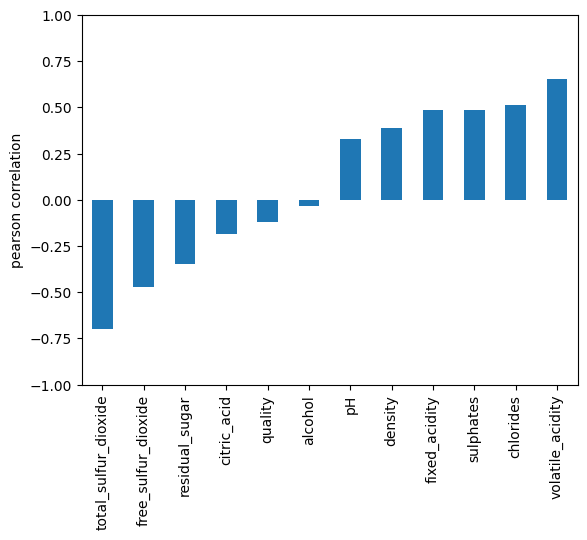

In [23]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation')

In [24]:
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


In [26]:
reduced_X = data[fields]
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(reduced_X)
X = pd.DataFrame(scaled_X, columns=[f"{col}_scaled" for col in fields])
X.columns

Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')

In [66]:
def plot_svm_decision_boundary(X,
                               y,
                               model,
                               fields):
    """_summary_

    Args:
        model (_type_): _description_
        fields (_type_): _description_
    """
    ax = plt.axes()
    ax.scatter(
        X.iloc[:, 0],
        X.iloc[:, 1],
        color=y,
        alpha=1.0
    )
    x_axis, y_axis = np.arange(0, 1.005, 0.005), np.arange(0, 1.005, 0.005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = model.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    ax.contourf(xx,
                yy,
                y_grid_predictions,
                cmap=plt.cm.autumn_r,
                alpha=.3)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        xlim=[0, 1],
        ylim=[0,1],
        title="Decision boundary for SVM Model."
    )

## Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01#sphx-glr-auto-examples-svm-plot-iris-svc-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=colors, alpha=.3)
```

With LinearSVC, it is easy to experiment with different parameter choices and see the decision boundary.


Fitting SVC for new X.

In [67]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(X, y)

LinearSVC()

Taking sample of 300 and creating X_color and y_color

In [68]:
X_color = X.sample(300, random_state=42)
y_color = y[X_color.index]

Modifying y_color to new encoding.

In [69]:
#this is not ideal. already applied manual binary encoding but this should be fine for here
y_color=y_color.map(lambda x: 'red' if x == 1 else 'yellow')

In [70]:
print(f"X_color shape: {X_color.shape}, y_color shape: {y_color.shape}")

X_color shape: (300, 2), y_color shape: (300,)


In [71]:
plot_svm_decision_boundary(X_color, y_color, svc_model, fields)

TypeError: plot_svm_decision_boundary() takes 4 positional arguments but 5 were given